![](images/undist-and-warp.png)

Given the camera matrix, `mtx`, and the distorion coefficients `dist`, the goal is to generate output like the image shown above. To do that, we need to write a function that takes the distorted image as input and completes the following steps:
- Undistort the image using `cv2.undistort()` with `mtx` and `dist`
- Convert to grayscale
- Find the chessboard corners
- Draw corners
- Define 4 source points (the outer 4 corners detected in the chessboard pattern)
- Define 4 destination points (must be listed in the same order as src points!)
- Use `cv2.getPerspectiveTransform()` to get `M`, the transform matrix
- Use `cv2.warpPerspective()` to apply `M` and warp your image to a top-down view

**Hint:** Source points are the x and y pixel values of any four ocrners on your chessboard, you can extract these from the `corners` array ouput from `cv2.findChessboardCorners()`. Your destination points are the x and y values of where your want those four corners to be mapped to in the output image.

In [13]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load(open("images/wide_dist_pickle.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [46]:
# Read in an image
img = cv2.imread('images/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of insdie corners in y

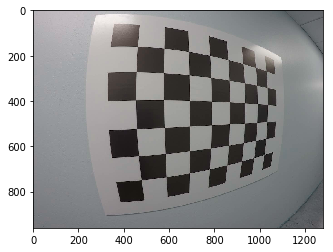

In [47]:
plt.figure()
plt.imshow(img)

In [62]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Undistort image with mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    # Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If corners found:
    if ret:
        # Draw corner
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        
        # Define 4 source points
        src = np.float32([corners[0],    # top-left
                          corners[1],    # top-right
                          corners[nx+1], # bottom-right
                          corners[nx]])  # bottom-left
        
        dst = np.float32([[50, 50],
                          [200, 50],
                          [200, 200],
                          [50, 200]])
        
        # Get transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        
        # Warp image
        img_size = (gray.shape[1], gray.shape[0])
        warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
        
        return warped, M
    return None

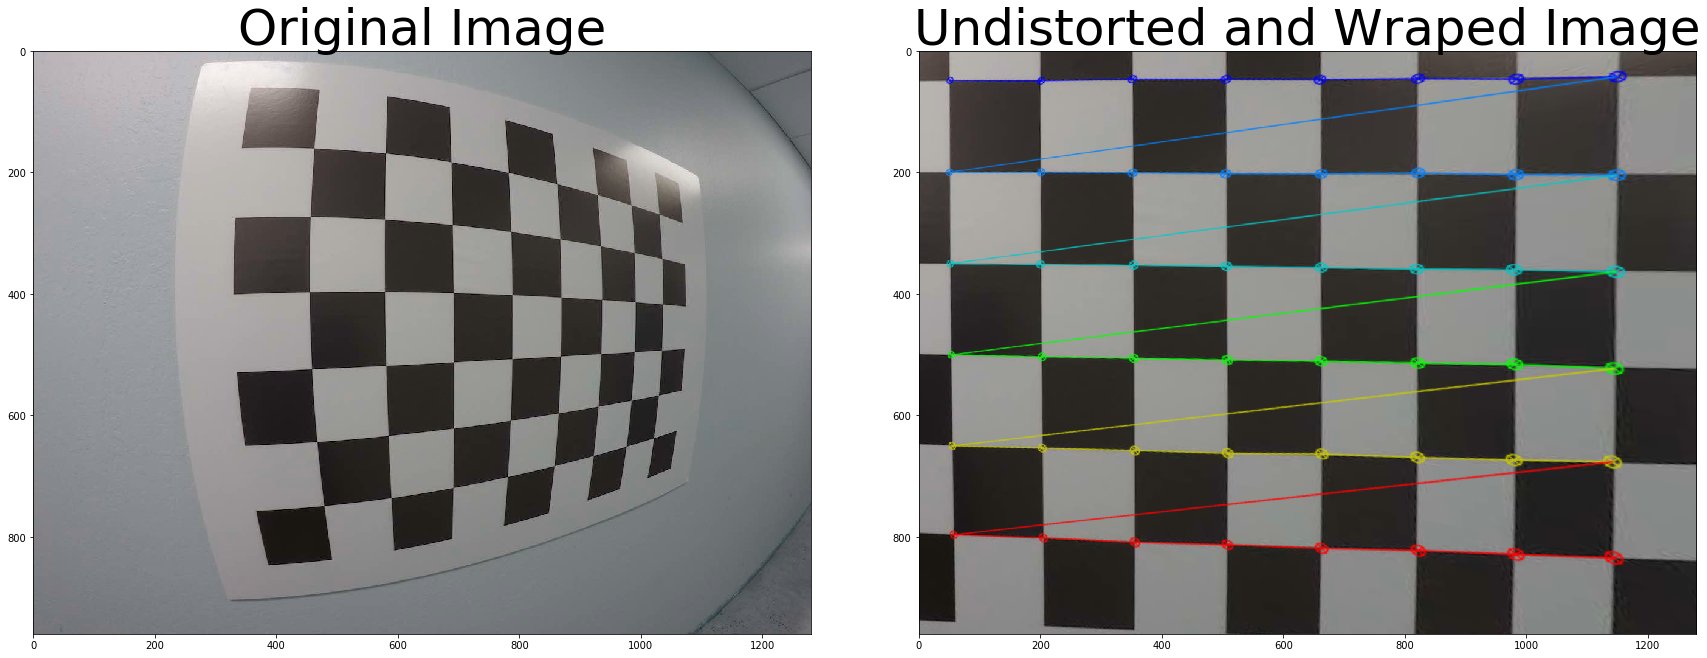

In [65]:
# Display result
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Wraped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)